## Dataset: [College Majors (recent-grads)](https://github.com/fivethirtyeight/data/tree/master/college-majors)
Source : [FiveThirtyEight datasets](https://data.fivethirtyeight.com/)


### Analise Burko & Marcos de la Torre

## Description of the data

### What type of data do you have?

>The chosen dataset is recent-grads.csv. The data is sourced from the American Community Survey 2010-2012 public use microdata series and contains information on basic earnings and labor force information associated to various college majors. Most features are numerical values of employment status by major, additionally containing features such as sex and type of job. The data is taken from recent graduates:

| Variable Name | Description| Data type |
| :-- | :-- | :-- |
| Major_code |Major code, FO1DP in ACS PUMS|Identifier of the row
| Major | Major description| Descriptive
| Major_category| Category of major from Carnevale et al| Categorical
| Total| Total number of people with major| Numerical (count)
| Men| Number of men in major| Numerical (count)
| Women| Number of women in major| Numerical (count)
| Employed| Number employed (ESR == 1 or 2)| Numerical (count)
| Unemployed| Number unemployed (ESR == 3)| Numerical (count)
| Full_time_year_round | Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)|Numerical (count)
| Median_income| Median earnings of full-time, year-round workers| Numerical (real)
| College_jobs| Number with job requiring a college degree| Numerical (count)
| Non_college_jobs| Number with job not requiring a college degree| Numerical (count)
| Low_wage_jobs| Number in low-wage service jobs| Numerical (count)


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
import altair as alt 
alt.data_transformers.enable('json')

recent_grads = pd.read_csv('data/recent-grads.csv')

to_drop = ['Rank','Full_time','Part_time', 'Unemployment_rate','ShareWomen', 'P25th','P75th',
           'Sample_size']
recent_grads.drop(to_drop, axis=1, inplace=True)
recent_grads['Major_code'] = recent_grads['Major_code'].apply(str)

recent_grads.dropna(subset = ['Total'], inplace=True)
recent_grads.isna().sum()
recent_grads.astype({'Total': 'int64', 'Men': 'int64', 'Women': 'int64'}).dtypes

recent_grads = recent_grads.rename(columns={'Median': 'Median_income'})

# Convert major name to title case
recent_grads['Major'] = recent_grads['Major'].str.title()

# Get short names of majors
major_list = pd.read_csv('data/major_short_names.csv')
recent_grads = pd.merge(major_list, recent_grads, how='right')
recent_grads.rename(columns={'Major':'Major_long'}, inplace=True)
recent_grads.rename(columns={'Major_short':'Major'}, inplace=True)

In [3]:
recent_grads.head()

,Major_category,Major_long,Major,Major_code,Total,Men,Women,Employed,Full_time_year_round,Unemployed,Median_income,College_jobs,Non_college_jobs,Low_wage_jobs
0,Engineering,Petroleum Engineering,Petroleum Eng.,2419,2339.0,2057.0,282.0,1976,1207,37,110000,1534,364,193
1,Engineering,Mining And Mineral Engineering,Mining & Mineral Eng.,2416,756.0,679.0,77.0,640,388,85,75000,350,257,50
2,Engineering,Metallurgical Engineering,Metallurgical Eng.,2415,856.0,725.0,131.0,648,340,16,73000,456,176,0
3,Engineering,Naval Architecture And Marine Engineering,Naval Architecture & Marine Eng.,2417,1258.0,1123.0,135.0,758,692,40,70000,529,102,0
4,Engineering,Chemical Engineering,Chemical Eng.,2405,32260.0,21239.0,11021.0,25694,16697,1672,65000,18314,4440,972


### What is the range of values? Which units are used? What precision is required?

>The numerical data in the given datasets are represented by counts and rates, aside from 'Median' (US Dollars). The table below describes key statistical features for each relavent column, including a minimum and maximum. All columns aside from 'Median' represent individual persons and therefore the precision should remain as whole integers.

In [4]:
recent_grads.describe()

,Total,Men,Women,Employed,Full_time_year_round,Unemployed,Median_income,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,39370.081395,16723.406977,22646.674419,31355.80814,19798.843023,2428.412791,40076.744186,12387.401163,13354.325581,3878.633721
std,63483.491009,28122.433474,41057.330740,50777.42865,33229.227514,4121.730452,11461.388773,21344.967522,23841.326605,6960.467621
min,124.000000,119.000000,0.000000,0.00000,111.000000,0.000000,22000.000000,0.000000,0.000000,0.000000
25%,4549.750000,2177.500000,1778.250000,3734.75000,2474.750000,299.500000,33000.000000,1744.750000,1594.000000,336.750000
50%,15104.000000,5434.000000,8386.500000,12031.50000,7436.500000,905.000000,36000.000000,4467.500000,4603.500000,1238.500000
75%,38909.750000,14631.000000,22553.750000,31701.25000,17674.750000,2397.000000,45000.000000,14595.750000,11791.750000,3496.000000
max,393735.000000,173809.000000,307087.000000,307933.00000,199897.000000,28169.000000,110000.000000,151643.000000,148395.000000,48207.000000


### What is it's life span? (how often should it be updated)

>The dataset is taken from census surveys from 2010-2012. It is reasonable to assume a short lifespan considering the constant flux of the labor market, and thereby should ideally be updated each year to maintain accuracy.

### How is it distributed?

>The first figure shows representation of major categories, where areas such as engineering and education have much higher occurence than communications and interdisciplinary majors shown left. The mean Median income for major categories is shown on right. The figure 'Distributions of Numerical Variables' plots histograms for each variables, revealing left-skews for all variables aside from 'Median' which takes on a more normal distribution.

Text(0.5, 1.0, 'Median Income')

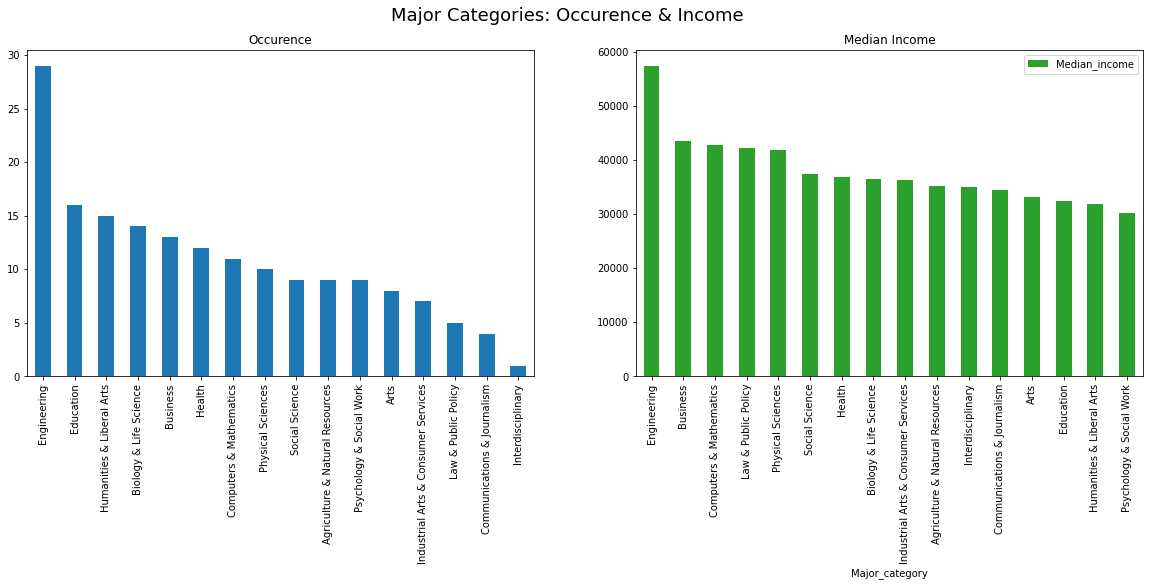

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
plt.suptitle('Major Categories: Occurence & Income', fontsize=18)

recent_grads['Major_category'].value_counts().plot(ax=ax1, kind='bar', color='tab:blue'
                                                  ).set_title('Occurence')
#.set_title('Major-Category Occurence', fontsize=16)

sal_groups = recent_grads[['Major_category','Median_income']].groupby('Major_category').mean()
sal_groups.sort_values(by=['Median_income'], ascending=False).plot(ax=ax2, kind='bar', color='tab:green'
                                                           ).set_title('Median Income')


Text(0.5, 1.0, 'Low_wage_jobs')

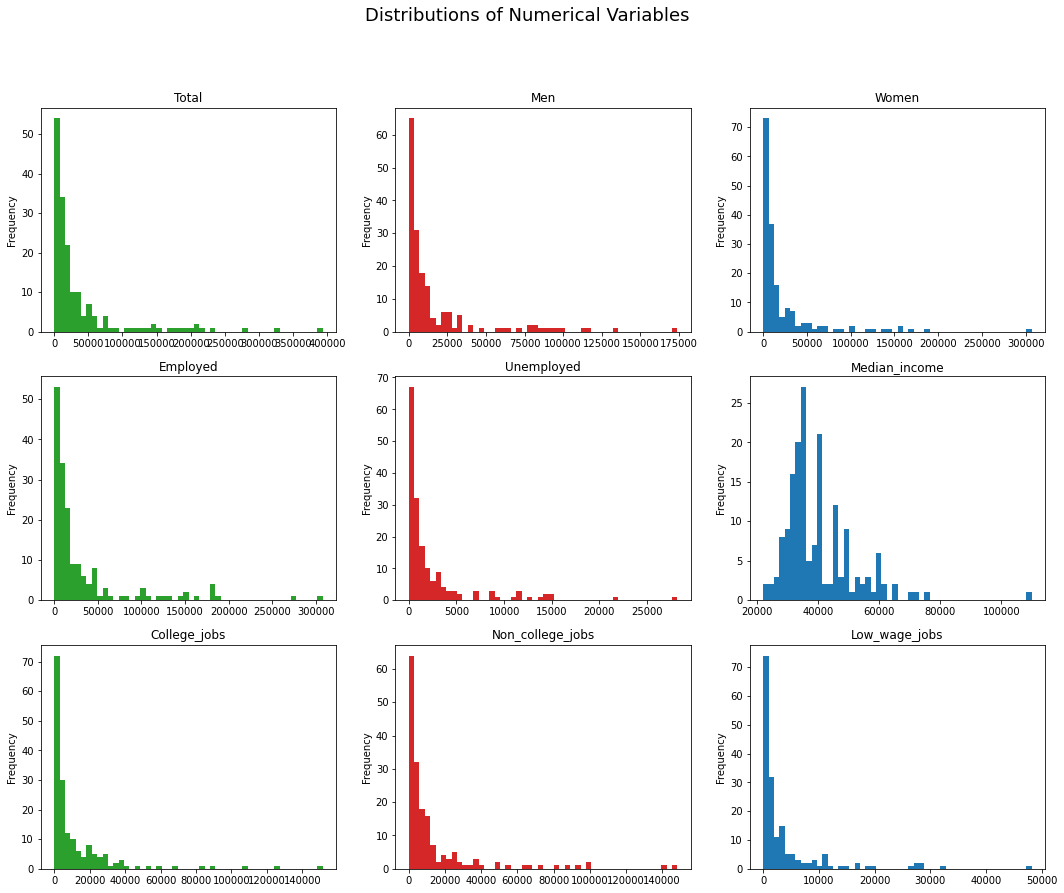

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize = (18,14))
plt.suptitle('Distributions of Numerical Variables', fontsize=18)

recent_grads['Total'].plot(ax=ax1, kind='hist', bins=50, color='tab:green').set_title('Total')
recent_grads['Men'].plot(ax=ax2, kind='hist', bins=50, color='tab:red').set_title('Men')
recent_grads['Women'].plot(ax=ax3, kind='hist', bins=50,color='tab:blue').set_title('Women')
recent_grads['Employed'].plot(ax=ax4, kind='hist', bins=50,color='tab:green').set_title('Employed')
recent_grads['Unemployed'].plot(ax=ax5, kind='hist', bins=50,color='tab:red').set_title('Unemployed')
recent_grads['Median_income'].plot(ax=ax6, kind='hist', bins=50,color ='tab:blue').set_title('Median_income')
recent_grads['College_jobs'].plot(ax=ax7, kind='hist', bins=50,color ='tab:green').set_title('College_jobs')
recent_grads['Non_college_jobs'].plot(ax=ax8, kind='hist', bins=50,color ='tab:red').set_title('Non_college_jobs')
recent_grads['Low_wage_jobs'].plot(ax=ax9, kind='hist', bins=50,color ='tab:blue').set_title('Low_wage_jobs')


### Are there outliers? Identify relations and groupings

>The prominent grouping of this dataset is by 'Major_category' to compare records of the same fields internally and against other groups. Looking at the box plots of numerical variables by Major category leads some initial intuition of outliers. Varables 'Total', 'Women', 'Unemployed', and 'Non_college_jobs' have obvious outliers.

Text(0.5, 1.0, 'Variable Distributions by Major Category')

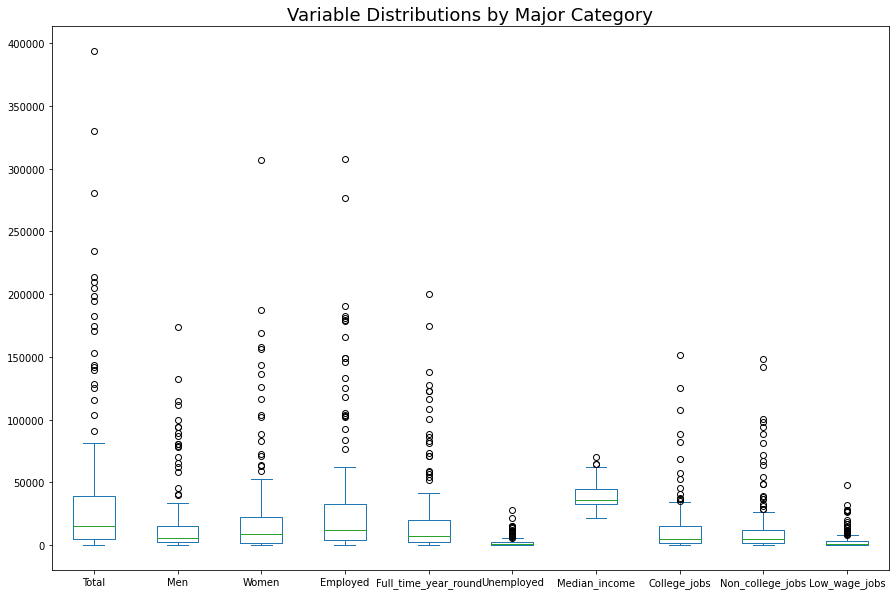

In [7]:
recent_grads[3:].plot(x='Major_category',kind='box', figsize=(15,10))
plt.title('Variable Distributions by Major Category', fontsize=18)

# Audience

The audience of these charts are not expected to be experts in the usage of charts. They will access the charts from a PC or a smartphone. They will consult the visualization occasionally.

The main **message** of these charts is that the kind of job that graduates may obtain depends strongly on their major.
An additional message is that there may be differences between male and female students in their choice of majors.

We have identified the following typical kinds of users ("**personas**"):

- Persona 1: Prospective student  
  Goal: Help them choose a major, by understanding what impact of their choice may have in their future job opportunities and   earnings.  

- Persona 2: Faculty administration  
  Goal: Understand which majors are more demanded by students and by the job market, and take it into account for planning the offering of places and hiring of new professors.  

- Persona 3: Government official  
  Goal: Investigate possible actions to improve social mobility, by helping children of poor families to obtain a degree that may lead to well-paid jobs. Investigate majors in which the rate of female students is very low, to possibly promote actions against negative stereotypes. Investigate which majors typically result in jobs requiring a college degree or not.  

Based on the goals indicated previously, here are a number of **questions** that the charts should help to answer.
- How do median earnings of recent graduates vary depending on their kind of major?
- Which are the majors with the highest earnings?
- Which are the majors with the most graduate students?
- Is there a difference on the chosen majors between male and female students?
- Which majors/major categories are more likely to result in a job requiring a college degree?


## Scenario

Maria has just finished high school and is wondering what degree she should study. In principle she is interested in Mathematics and also in Psychology.

Maria hears about the dashboard that compares job opportunities for graduates of different majors, and she decides to consult it. 

In the top-level dashboard she sees that the area of Mathematics offers much better chances to get a job than Psychology, as well as considerably higher salaries. Within Mathematics, she checks the drill-down by specific major and realises that the major of Applied Mathematics, which she is attracted to, offers good prospects to obtain qualified jobs (that require a degree) as well as an outstanding expected income. This helps her decide to major in this subject.

# "Napkin" design

### Dashboard level 1

Level 1 shows data by **major category**. For each category, the **average income** and the **% of employed** students are displayed in two parallel bar charts.

A tooltip is available to view the exact data.

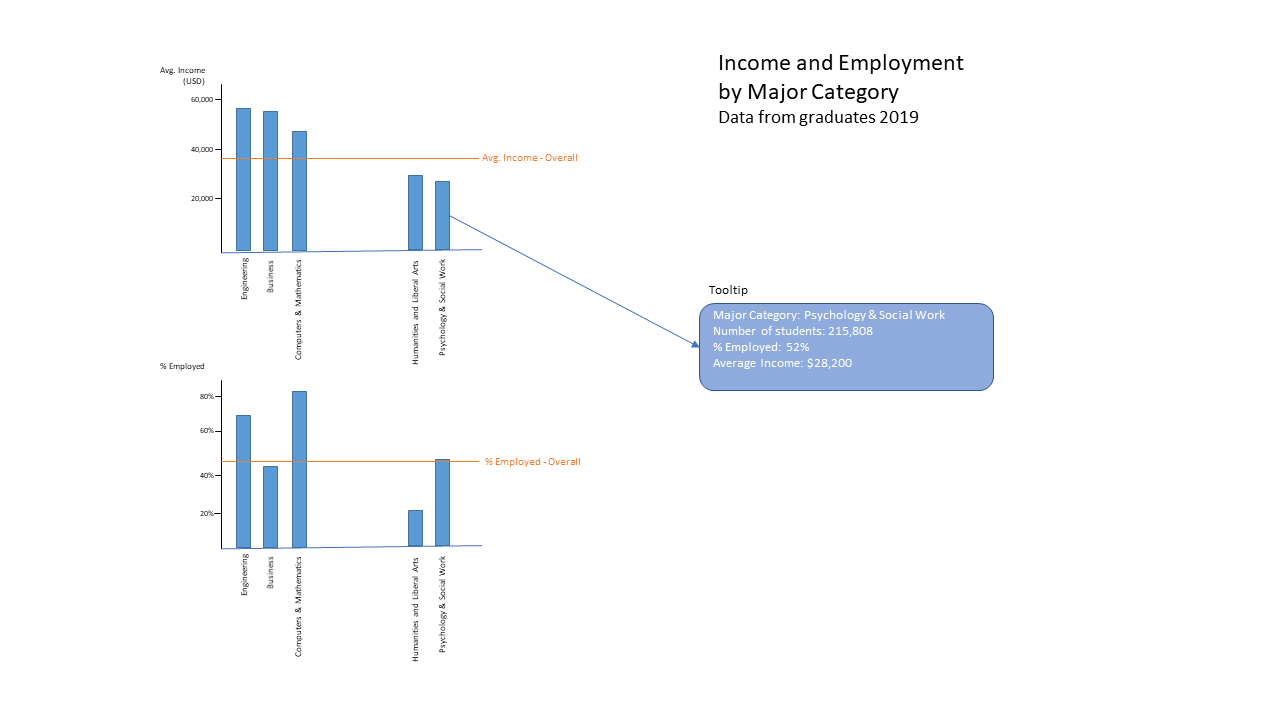

In [8]:
display.Image("./images/napkin_design_level1.png")

### Dashboard level 2

By clicking on the bar of a major category, we drill down into level 2.

Level 2 shows data by **major**, filtered by the selected major category.

For each major, the **average income** and the **% of employed** students are displayed in two parallel bar charts. The % of employment is divided between jobs that **require a degree** and those that don't. We can see as context the average values for the category and overall.

A tooltip is available to view the exact data.

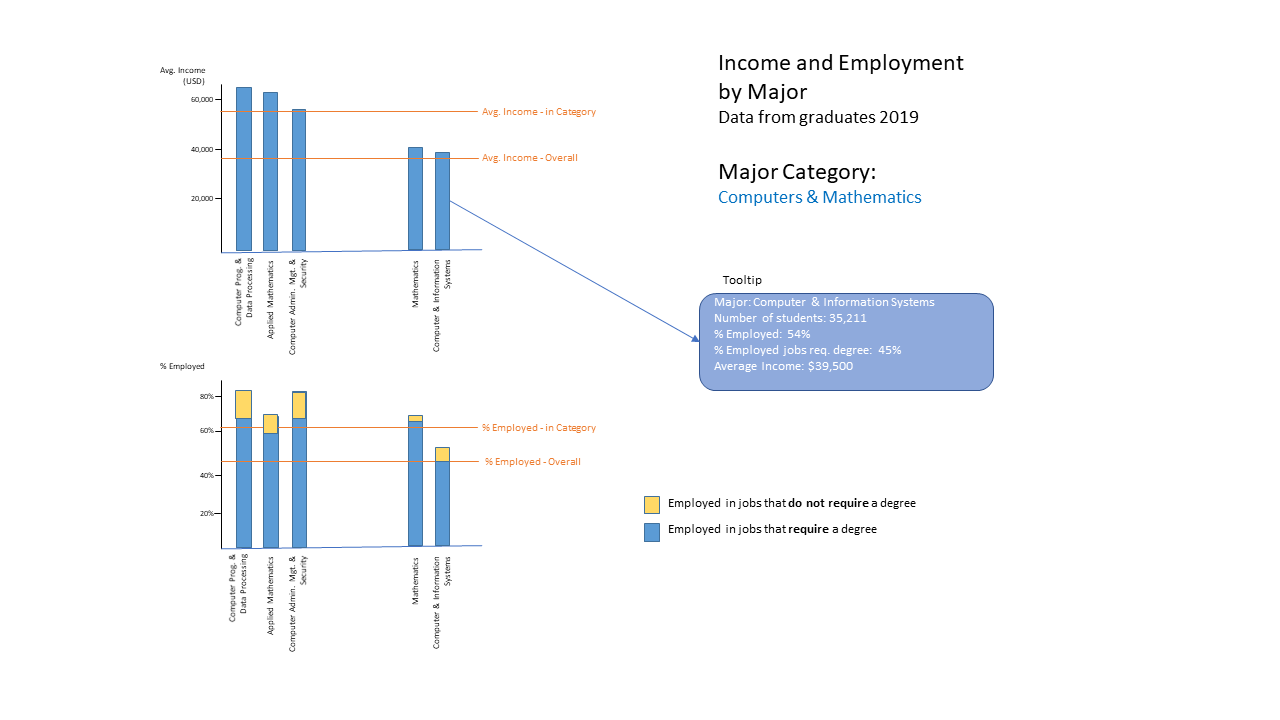

In [9]:
display.Image("./images/napkin_design_level2.png")

# Task 4: First Implementations in Altair

**Note on the calculation of the median income:** We have the median income for each major, and need to aggregate it into major categories. Strictly speaking, it is not possible to infer the real median income by category from this data. We will approximate it using the mean of the different median incomes weighted by the number of students in each major.

**Issue:** college + non_college jobs do not add up to "employed". We wondered if the "low wage jobs" would be a separate category that had to be added to calculate the % of college jobs. This is not the case.
Finally, to calculate % of college jobs, we just do `college_jobs/(college_jobs+non_college_jobs)`

In [10]:
recent_grads['Percent_employed'] = recent_grads['Employed'] / (recent_grads['Employed'] + recent_grads['Unemployed'])
recent_grads['Percent_college_jobs'] = recent_grads['College_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads['Percent_non_college_jobs'] = recent_grads['Non_college_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
# recent_grads['Percent_low_wage_jobs'] = recent_grads['Low_wage_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'] + recent_grads['Low_wage_jobs'])
recent_grads['Total_income'] = recent_grads['Median_income'] * recent_grads['Full_time_year_round']
recent_grads.head()

,Major_category,Major_long,Major,Major_code,Total,Men,Women,Employed,Full_time_year_round,Unemployed,Median_income,College_jobs,Non_college_jobs,Low_wage_jobs,Percent_employed,Percent_college_jobs,Percent_non_college_jobs,Total_income
0,Engineering,Petroleum Engineering,Petroleum Eng.,2419,2339.0,2057.0,282.0,1976,1207,37,110000,1534,364,193,0.981619,0.808219,0.191781,132770000
1,Engineering,Mining And Mineral Engineering,Mining & Mineral Eng.,2416,756.0,679.0,77.0,640,388,85,75000,350,257,50,0.882759,0.576606,0.423394,29100000
2,Engineering,Metallurgical Engineering,Metallurgical Eng.,2415,856.0,725.0,131.0,648,340,16,73000,456,176,0,0.975904,0.721519,0.278481,24820000
3,Engineering,Naval Architecture And Marine Engineering,Naval Architecture & Marine Eng.,2417,1258.0,1123.0,135.0,758,692,40,70000,529,102,0,0.949875,0.838352,0.161648,48440000
4,Engineering,Chemical Engineering,Chemical Eng.,2405,32260.0,21239.0,11021.0,25694,16697,1672,65000,18314,4440,972,0.938902,0.804869,0.195131,1085305000


In [11]:
# sum_cols = ['Total', 'Men', 'Women', 'Employed', 'Unemployed', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs']

df_cat = recent_grads.groupby('Major_category').agg({'Total_income': 'sum', 'Total': 'sum', 'Men': 'sum', 'Women': 'sum',
                    'Employed': 'sum', 'Unemployed': 'sum', 'Full_time_year_round': 'sum', 'College_jobs': 'sum',
                    'Non_college_jobs': 'sum', 'Low_wage_jobs': 'sum'})
df_cat.reset_index(level=0, inplace=True)

# See note above about the approximation of median income by category
df_cat['Median_income'] = round(df_cat['Total_income'] / df_cat['Full_time_year_round'])
df_cat['Percent_employed'] = (df_cat['Employed'] / (df_cat['Employed'] + df_cat['Unemployed']))*100
df_cat['Percent_unemployed'] = (df_cat['Unemployed'] / (df_cat['Employed'] + df_cat['Unemployed']))*100
df_cat['Percent_men'] = (df_cat['Men'] / (df_cat['Men'] + df_cat['Women']))*100
df_cat['Percent_women'] = (df_cat['Women'] / (df_cat['Men'] + df_cat['Women']))*100
df_cat['Percent_college_jobs'] = (df_cat['College_jobs'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs']))*100
df_cat['Percent_non_college_jobs'] = (df_cat['Non_college_jobs'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs']))*100
# df_cat['Percent_low_wage_jobs'] = df_cat['Low_wage_jobs'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs'] + df_cat['Low_wage_jobs'])
df_cat.head()

,Major_category,Total_income,Total,Men,Women,Employed,Unemployed,Full_time_year_round,College_jobs,Non_college_jobs,Low_wage_jobs,Median_income,Percent_employed,Percent_unemployed,Percent_men,Percent_women,Percent_college_jobs,Percent_non_college_jobs
0,Agriculture & Natural Resources,1475428000,75620.0,40357.0,35263.0,63794,3486,41891,18677,33217,7414,35221.0,94.818668,5.181332,53.368157,46.631843,35.990673,64.009327
1,Arts,4889302500,357130.0,134390.0,222740.0,288114,28228,153111,94785,163720,60116,31933.0,91.076746,8.923254,37.630555,62.369445,36.666602,63.333398
2,Biology & Life Science,5705335000,453862.0,184919.0,268943.0,302797,22854,165802,151233,127182,42742,34411.0,92.982057,7.017943,40.743442,59.256558,54.319272,45.680728
3,Business,32438261000,1302376.0,667852.0,634524.0,1088742,79877,790425,148538,496570,126788,41039.0,93.164838,6.835162,51.279508,48.720492,23.025292,76.974708
4,Communications & Journalism,7442938000,392601.0,131921.0,260680.0,330660,26852,214228,86556,172992,49595,34743.0,92.489203,7.510797,33.601799,66.398201,33.348745,66.651255


In [12]:
# Required for stacked bar chart: Data set with separate rows for "Percent_employed" and "Percent_unemployed"
df_cat_E = pd.melt(df_cat, id_vars=['Major_category', 'Median_income'], value_vars=['Percent_employed', 'Percent_unemployed'], 
        var_name='Status', value_name='Percentage')
df_cat_E.head()

,Major_category,Median_income,Status,Percentage
0,Agriculture & Natural Resources,35221.0,Percent_employed,94.818668
1,Arts,31933.0,Percent_employed,91.076746
2,Biology & Life Science,34411.0,Percent_employed,92.982057
3,Business,41039.0,Percent_employed,93.164838
4,Communications & Journalism,34743.0,Percent_employed,92.489203


In [13]:
# Major categories sorted by median income - used to keep the same sorting as the other chart
sorted_categories = df_cat.sort_values(by=['Median_income'], ascending=False)['Major_category'].tolist()

### Level 1 Visualizations

In [14]:

#selection = alt.selection_single();
#color="#73a1eb"

def cat_plots():
    bars = alt.Chart(df_cat).mark_bar(color='#87CEFA', size=20, opacity=0.8).encode(
        y = alt.Y('Major_category:N', title=None, sort= '-x', axis=alt.Axis(labels=False, tickSize=0)),
        x = alt.X('Median_income:Q', title=None),
#        color = alt.condition(selection, 'Major_category:N', alt.value('grey')),
        tooltip = [alt.Tooltip('Major_category', title='Major Category'),
                   alt.Tooltip('Median_income', title='Median Income'),
                   alt.Tooltip('Total', title='Total Students'),
    ])

    color = 'crimson'
        
    rule = alt.Chart(recent_grads).mark_rule(color=color).encode(
        x = alt.X('mean(Median_income):Q'),
        size = alt.value(3),
#        tooltip = [alt.Tooltip('mean(Global Average')]
    )
    
    fontSize = 16
    dy = -80
    angle = 90
    fontWeight='bold'
    
    text1 = alt.Chart(recent_grads).mark_text(dx=300, dy=dy, color=color, fontSize=fontSize, text='Global Average: $', angle=angle, fontWeight=fontWeight).encode(
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )
    
    text2 = alt.Chart(recent_grads).mark_text(dx=390, dy=dy, color=color, fontSize=fontSize, angle=angle, fontWeight=fontWeight).encode(
        text = alt.Text('mean(Median_income):Q', format='.0f'),
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )

    incomes = (bars + rule + text1 + text2).properties(
        width=400,
        height=550,
        title='Median Income (USD)'
    )    


    # Bar chart showing percent employed by category
    employments = alt.Chart(df_cat_E).mark_bar(size=20, opacity=0.95).encode(
        y= alt.Y('Major_category:N', title=None, sort=sorted_categories, axis=alt.Axis(tickSize=0)),
        x= alt.X('Percentage:Q', title=None),
        color= alt.Color('Status:N', scale = alt.Scale(domain=['Percent_employed', 'Percent_unemployed'], range=['royalblue', 'lightgrey'])),
        order=alt.Order('Status', sort='ascending')
    ).properties(
        width=400,
        height=550,
        title='Employment Status (%)'
    )

    return alt.hconcat(employments, incomes).properties(spacing=5).configure_title(fontSize=18).configure_axis(
        grid=False,
        labelFontSize=14,
        titleFontSize=14
    )

dashboard = cat_plots()
dashboard

alt.HConcatChart(...)

In [15]:
import json
from pathlib import Path

Path('dashboard-spec.json').write_text(json.dumps(dashboard.to_dict()))

3055

### Level 2 Visualizations

For the second bar chart, calculate percent of employed and unemployed.
The data on college and non-college jobs does not add up to the total of jobs. This must be due to missing information, i.e. some employed graduates did not report this information. We will extrapolate and apply the % of college jobs to all jobs.
Therefore, the total number of students will be split into three separate groups:
- Unemployed
- Employed in job not requiring college
- Employed in job requiring college


In [16]:
recent_grads['Percent_unemployed'] = recent_grads['Unemployed'] / (recent_grads['Employed'] + recent_grads['Unemployed'])
recent_grads['Percent_employed'] = recent_grads['Employed'] / (recent_grads['Employed'] + recent_grads['Unemployed'])

# Split employed between college and non-college
recent_grads['Percent_employed_college_jobs'] = recent_grads['Percent_employed']*recent_grads['College_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads['Percent_employed_non_college_jobs'] = recent_grads['Percent_employed']*recent_grads['Non_college_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads.head()

# Required for stacked bar chart: Data set with separate rows for 'Percent_unemployed', 'Percent_employed_college_jobs' and
# 'Percent_employed_non_college_jobs'

df_RGE = pd.melt(recent_grads, id_vars=['Major', 'Major_category'], 
              value_vars=['Percent_unemployed', 'Percent_employed_college_jobs', 'Percent_employed_non_college_jobs'],
        var_name='Status', value_name='Percentage')
df_RGE.head()

# Majors sorted by median income - used to keep the same sorting as the other chart
sorted_majors = recent_grads.sort_values(by=['Median_income','Major'], ascending=[False, True])['Major'].tolist()

In [17]:
recent_grads[recent_grads.Major_category=='Engineering'].Major.count()

29

In [40]:
sorted_majors

['Petroleum Eng.',
 'Mining & Mineral Eng.',
 'Metallurgical Eng.',
 'Naval Architecture & Marine Eng.',
 'Chemical Eng.',
 'Nuclear Eng.',
 'Actuarial Science',
 'Astronomy & Astrophysics',
 'Aerospace Eng.',
 'Biomedical Eng.',
 'Computer Eng.',
 'Electrical Eng.',
 'Materials Science',
 'Mechanical Eng.',
 'Eng. Mechanics Physics & Science',
 'Biological Eng.',
 'Industrial & Manufacturing Eng.',
 'General Eng.',
 'Architectural Eng.',
 'Court Reporting',
 'Computer Science',
 'Electrical Eng. Technology',
 'Materials Eng. & Materials Science',
 'Management Information Systems & Statistics',
 'Civil Eng.',
 'Construction Services',
 'Eng. Tech.',
 'Environmental Eng.',
 'Geological & Geophysical Eng.',
 'Miscellaneous Eng.',
 'Miscellaneous Fine Arts',
 'Operations Logistics & E-Commerce',
 'Public Policy',
 'Nursing',
 'Economics',
 'Finance',
 'Business Economics',
 'Industrial Production Tech.',
 'Nuclear, Industrial Radiology, & Biological Tech.',
 'Accounting',
 'Applied Mathem

In [42]:
def major_plots(major_category):
    """plots income/employment charts for selected major"""
    
    num_majors = recent_grads[recent_grads.Major_category == major_category].Major.count()
    width = 500
    height = num_majors*25
    
    # plot income by major

    bars = alt.Chart(recent_grads).mark_bar(color='#87CEFA', size=15, opacity=0.8).encode(
        y = alt.Y('Major:N', title=None, sort=sorted_majors, axis=alt.Axis(labels=False, tickSize=0)),
        x = alt.X('Median_income:Q', title=None, scale=alt.Scale(domain=[0, 110000])),
        tooltip = [alt.Tooltip('Major', title='Major'),
                   alt.Tooltip('Median_income', title='Median Income'),
                   alt.Tooltip('Percent_employed', title='Percent Employed'),
                   alt.Tooltip('Percent_college_jobs', title='Percent College Jobs'),
    ]).transform_filter(
        (alt.datum.Major_category == major_category)
    )
    
    # average lines and labels
    
    color1 = 'crimson'
    color2 = 'dimgray'

    rule_cat = alt.Chart(recent_grads).mark_rule(color=color2).encode(
        x = alt.X('mean(Median_income):Q'),
        size = alt.value(3)
    ).transform_filter(
        (alt.datum.Major_category == major_category)
    )

    rule_global = alt.Chart(recent_grads).mark_rule(color=color1).encode(
        x = alt.X('mean(Median_income):Q'),
        size = alt.value(3)
    )
    
    fontSize = 14
    fontWeight = 'normal'
    
    annotation_locs = {'Agriculture & Natural Resources': (100, 165, 170, 60, 80, 80, 90),
                   'Arts': (75, 140, 160, 60, 90, 90, 90),
                   'Biology & Life Science': (150, 215, 235, 60, 80, 80, 90),
                   'Business': (120, 185, 190, 270, 250, 275, 0),
                   'Communications & Journalism': (120, 185, 190, 70, 50, 60, 0),
                   'Computers & Mathematics': (120, 185, 190, 230, 210, 225, 0),
                   'Education': (250, 315, 335, 60, 95, 95, 90),
                   'Engineering': (400, 465, 525, 60, -20, -20, 90),
                   'Health': (120, 185, 190, 250, 230, 240, 0),
                   'Humanities & Liberal Arts': (200, 265, 285, 60, 95, 95, 90),
                   'Industrial Arts & Consumer Services': (120, 185, 190, 140, 120, 123, 0),
                   'Interdisciplinary': (120, 185, 190, 90, 70, 73, 0),
                   'Law & Public Policy': (120, 185, 190, 100, 80, 85, 0),
                   'Physical Sciences': (120, 185, 190, 200, 180, 190, 0),
                   'Psychology & Social Work': (100, 165, 165, 60, 105, 105, 130, 90),
                   'Social Science': (120, 185, 190, 190, 170, 179, 0)
                  }
    
    dx_text, dx_val1, dx_val2, dy1, dy2, dy3, angle = annotation_locs[major_category]
    

    text1 = alt.Chart(recent_grads).mark_text(dx=dx_text, dy=dy1, color=color1, fontSize=fontSize, fontWeight=fontWeight, text='Global Avg: $', angle=angle).encode(
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )
    
    text2 = alt.Chart(recent_grads).mark_text(dx=dx_val1, dy=dy1, color=color1, fontSize=fontSize, fontWeight=fontWeight,angle=angle).encode(
        text = alt.Text('mean(Median_income):Q', format='.0f'),
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )
    
    text3 = alt.Chart(recent_grads).mark_text(dx=dx_text, dy=dy2, color=color2, fontSize=fontSize, fontWeight=fontWeight, text='Category Avg: $', angle=angle).encode(
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )
    
    text4 = alt.Chart(recent_grads).mark_text(dx=dx_val2, dy=dy3, color=color2, fontSize=fontSize, fontWeight=fontWeight, angle=angle).encode(
        text = alt.Text('mean(Median_income):Q', format='.0f'),
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    ).transform_filter(
        (alt.datum.Major_category == major_category)
    )
    
    income = (bars + rule_cat + rule_global + text1 + text2 + text3 + text4).properties(
        width=width,
        height=height,
        title='Median Income (USD)')
    
    # plot employment status by major 
    
    employment = alt.Chart(df_RGE).mark_bar(size=15).encode(
        y = alt.Y('Major:N', title=None, sort=sorted_majors, axis=alt.Axis(labelPadding=15, tickSize=0, labelFontSize=12)),
        x = alt.X('Percentage:Q', scale=alt.Scale(domain=[0, 1.0]), title=None),
        color = alt.Color('Status:N', 
                          scale = alt.Scale(domain=['Percent_employed_college_jobs', 'Percent_employed_non_college_jobs','Percent_unemployed'], range=['royalblue', 'darkgrey', 'lightgrey'])),
        order = alt.Order('Status', sort='ascending')
    ).properties(
        width=width,
        height=height,
        title='Employment Status (%)'
    ).transform_filter(
        (alt.datum.Major_category == major_category)
    )

    return alt.hconcat(employment, income).properties(spacing=5).configure_title(fontSize=18).configure_axis(
        grid=False,
        labelFontSize=14,
        titleFontSize=14
    )

major_plots('Engineering')

alt.HConcatChart(...)

In [ ]:
# save dashboard.json for each major category
dashboard = major_plots('Engineering')
Path('dashboard2-spec.json').write_text(json.dumps(dashboard.to_dict()))

dashboard = major_plots('Engineering')
Path('dashboard2-spec.json').write_text(json.dumps(dashboard.to_dict()))

## Testing dynamic filtering

In [ ]:
select_box = alt.binding_select(options=sorted_categories, name='major_category')
sel = alt.selection_single(fields=['major_category'], bind=select_box, init={'major_category': 'Agriculture & Natural Resources'})



num_majors = recent_grads[recent_grads.Major_category == major_category].Major.count()
width = 500
height = num_majors*25

# plot income by major

bars = alt.Chart(recent_grads).mark_bar(color='#87CEFA', size=15, opacity=0.8).encode(
    y = alt.Y('Major:N', title=None, sort= ['-x','Major'], axis=alt.Axis(labels=False, tickSize=0)),
    x = alt.X('Median_income:Q', title=None, scale=alt.Scale(domain=[0, 110000])),
    tooltip = [alt.Tooltip('Major', title='Major'),
               alt.Tooltip('Percent_employed', title='Percent Employed'),
               alt.Tooltip('Percent_college_jobs', title='Percent College Jobs'),
]).transform_filter(
    (alt.datum.Major_category == major_category)
)

# average lines and labels

color1 = 'crimson'
color2 = 'dimgray'

rule_cat = alt.Chart(recent_grads).mark_rule(color=color2).encode(
    x = alt.X('mean(Median_income):Q'),
    size = alt.value(3)
).transform_filter(
    (alt.datum.Major_category == major_category)
)

rule_global = alt.Chart(recent_grads).mark_rule(color=color1).encode(
    x = alt.X('mean(Median_income):Q'),
    size = alt.value(3)
)

fontSize = 14
fontWeight = 'normal'

annotation_locs = {'Agriculture & Natural Resources': (100, 165, 170, 60, 80, 90),
               'Arts': (75, 140, 160, 60, 90, 90),
               'Biology & Life Science': (150, 215, 235, 60, 80, 90),
               'Business': (120, 185, 185, 270, 250, 0),
               'Communications & Journalism': (120, 185, 185, 70, 50, 0),
               'Computers & Mathematics': (120, 185, 185, 230, 210, 0),
               'Education': (250, 315, 335, 60, 95, 90),
               'Engineering': (400, 465, 525, 60, -20, 90),
               'Health': (120, 185, 185, 250, 230, 0),
               'Humanities & Liberal Arts': (200, 265, 285, 60, 95, 90),
               'Industrial Arts & Consumer Services': (120, 185, 185, 140, 120, 0),
               'Interdisciplinary': (120, 185, 185, 90, 70, 0),
               'Law & Public Policy': (120, 185, 185, 100, 80, 0),
               'Physical Sciences': (120, 185, 185, 200, 180, 0),
               'Psychology & Social Work': (120, 185, 185, 190, 170, 0),
               'Social Science': (120, 185, 185, 190, 170, 0)
              }

dx_text, dx_val1, dx_val2, dy1, dy2, angle = annotation_locs[major_category]


text1 = alt.Chart(recent_grads).mark_text(dx=dx_text, dy=dy1, color=color1, fontSize=fontSize, fontWeight=fontWeight, text='Global Avg: $', angle=angle).encode(
    y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
)

text2 = alt.Chart(recent_grads).mark_text(dx=dx_val1, dy=dy1, color=color1, fontSize=fontSize, fontWeight=fontWeight,angle=angle).encode(
    text = alt.Text('mean(Median_income):Q', format='.0f'),
    y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
)

text3 = alt.Chart(recent_grads).mark_text(dx=dx_text, dy=dy2, color=color2, fontSize=fontSize, fontWeight=fontWeight, text='Category Avg: $', angle=angle).encode(
    y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
)

text4 = alt.Chart(recent_grads).mark_text(dx=dx_val2, dy=dy2, color=color2, fontSize=fontSize, fontWeight=fontWeight, angle=angle).encode(
    text = alt.Text('mean(Median_income):Q', format='.0f'),
    y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
).transform_filter(
    (alt.datum.Major_category == major_category)
)

income = (bars + rule_cat + rule_global + text1 + text2 + text3 + text4).properties(
    width=width,
    height=height,
    title='Median Income (USD)')

# plot employment status by major 

employment = alt.Chart(df_RGE).mark_bar(size=15).encode(
    y = alt.Y('Major:N', title=None, sort=sorted_majors, axis=alt.Axis(labelPadding=15, tickSize=0, labelFontSize=11)),
    x = alt.X('Percentage:Q', scale=alt.Scale(domain=[0, 1.0]), title=None),
    color = alt.Color('Status:N', 
                      scale = alt.Scale(domain=['Percent_employed_college_jobs', 'Percent_employed_non_college_jobs','Percent_unemployed'], range=['royalblue', 'darkgrey', 'lightgrey'])),
    order = alt.Order('Status', sort='ascending')
).properties(
    width=width,
    height=height,
    title='Employment Status (%)'
).transform_filter(
    (alt.datum.Major_category == major_category)
)

return alt.hconcat(employment, income).properties(spacing=5).configure_title(fontSize=18).configure_axis(
    grid=False,
    labelFontSize=14,
    titleFontSize=14
)

In [19]:
major_cats_list = df_cat.Major_category.to_list()
select_box = alt.binding_select(options=major_cats_list, name='major_category')
sel = alt.selection_single(fields=['major_category'], bind=select_box, init={'major_category': 'Agriculture & Natural Resources'})


# plot income by major

bars = alt.Chart(recent_grads).mark_bar(color='#87CEFA', size=15, opacity=0.8).encode(
    y = alt.Y('Major:N', title=None, sort= ['-x','Major'], axis=alt.Axis(labels=False, tickSize=0)),
    x = alt.X('Median_income:Q', title=None, scale=alt.Scale(domain=[0, 110000])),
    tooltip = [alt.Tooltip('Major', title='Major'),
               alt.Tooltip('Percent_employed', title='Percent Employed'),
               alt.Tooltip('Percent_college_jobs', title='Percent College Jobs'),
# ]).transform_fold(
#     sorted_categories,
#     as_=['column', 'value']
]).transform_filter(
    sel
).add_selection(
    sel
)

bars

alt.Chart(...)

In [ ]:
def major_plots(major_category):
    """plots income/employment charts for selected major"""
    
    num_majors = recent_grads[recent_grads.Major_category == major_category].Major.count()
    width = 400
    height = num_majors*25
    
    
    # plot income by major

    bars = alt.Chart(recent_grads).mark_bar(color='#87CEFA', size=15, opacity=0.8).encode(
        y = alt.Y('Major:N', title=None, sort= ['-x','Major'], axis=alt.Axis(labels=False, tickSize=0)),
        x = alt.X('Median_income:Q', title=None, scale=alt.Scale(domain=[0, 110000])),
        tooltip = [alt.Tooltip('Major', title='Major'),
                   alt.Tooltip('Percent_employed', title='Percent Employed'),
                   alt.Tooltip('Percent_college_jobs', title='Percent College Jobs'),
    ]).transform_filter(
        (alt.datum.Major_category == major_category)
    )
    
    
    # average lines and labels
    
    color1 = 'crimson'
    color2 = 'dimgray'
    

    rule_cat = alt.Chart(recent_grads).mark_rule(color=color2).encode(
        x = alt.X('mean(Median_income):Q'),
        size = alt.value(3)
    ).transform_filter(
        (alt.datum.Major_category == major_category)
    )
    

    rule_global = alt.Chart(recent_grads).mark_rule(color=color1).encode(
        x = alt.X('mean(Median_income):Q'),
        size = alt.value(3)
    )
    
    fontSize = 14
    fontWeight = 'normal'
    
    dx_text = 85
    dx_val1 = dx_text+60
    dx_val2 = dx_text+70
    dy1 = height-100 #set for global average
    dy2 = height-120
    

    text1 = alt.Chart(recent_grads).mark_text(dx=dx_text, dy=dy1, color=color1, fontSize=fontSize, fontWeight=fontWeight, text='Global Avg: $').encode(
                y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )
    
    text2 = alt.Chart(recent_grads).mark_text(dx=dx_val1, dy=dy1, color=color1, fontSize=fontSize, fontWeight=fontWeight).encode(
        text = alt.Text('mean(Median_income):Q', format='.0f'),
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )
    
    text3 = alt.Chart(recent_grads).mark_text(dx=dx_text, dy=dy2, color=color2, fontSize=fontSize, fontWeight=fontWeight, text='Category Avg: $').encode(
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )
    
    text4 = alt.Chart(recent_grads).mark_text(dx=dx_val2, dy=dy2+48, color=color2, fontSize=fontSize, fontWeight=fontWeight).encode(
        text = alt.Text('mean(Median_income):Q', format='.0f'),
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    ).transform_filter(
        (alt.datum.Major_category == major_category)
    )
    
    income = (bars + rule_cat + rule_global + text1 + text2 + text3 + text4).properties(
        width=width,
        height=height,
        title='Median Income (USD)')
    
    
    # plot employment status by major 
    
    employment = alt.Chart(df_RGE).mark_bar(size=15).encode(
        y = alt.Y('Major:N', title=None, sort=sorted_majors, axis=alt.Axis(tickSize=0, labelFontSize=11, labelPadding=10)),
        x = alt.X('Percentage:Q', scale=alt.Scale(domain=[0, 1.0]), title=None),
        color = alt.Color('Status:N', 
                          scale = alt.Scale(domain=['Percent_employed_college_jobs', 'Percent_employed_non_college_jobs','Percent_unemployed'], range=['royalblue', 'darkgrey', 'lightgrey'])),
        order = alt.Order('Status', sort='ascending')
    ).properties(
        width=width,
        height=height,
        title='Employment Status (%)'
    ).transform_filter(
        (alt.datum.Major_category == major_category)
    )

    return alt.hconcat(employment, income).properties(spacing=5).configure_title(fontSize=18).configure_axis(
        grid=False,
        labelFontSize=14,
        titleFontSize=14
    )

major_plots('Engineering')

In [ ]:
dashboard = major_plots('Engineering')
Path('dashboard2-spec.json').write_text(json.dumps(dashboard.to_dict()))

In [ ]:
def supp_charts(major_category, category_list):
    base = alt.Chart(recent_grads).mark_bar(color='#87CEFA', size=15).encode(
        x = alt.X('Major:N', title=None, sort= ['-y','Major'], axis=alt.Axis(labels=False)),
        y = alt.Y('Median_income:Q', title='Mean Income'),
        tooltip = [alt.Tooltip('Major', title='Major'),
                   alt.Tooltip('Percent_employed', title='Percent Employed'),
                   alt.Tooltip('Percent_college_jobs', title='Percent College Jobs'),
    ])

    rule_cat = alt.Chart(recent_grads).mark_rule(color='grey').encode(
        y = alt.Y('mean(Median_income):Q'),
        size = alt.value(3)
    )

    rule_global = alt.Chart(recent_grads).mark_rule(color='red').encode(
        y = alt.Y('mean(Median_income):Q'),
        size = alt.value(3)
    )

    income = (base + rule_cat + rule_global).properties(
        width=800,
        height=400,
        title='Median Income')

    chart = alt.hconcat()
    for major in major_cats_list:
        chart |= base.transform_filter(alt.datum.Major_category == major)
    chart

In [ ]:
base = alt.Chart(recent_grads).mark_bar(color='#203082', size=15).encode(
    x = alt.X('Major:N', title=None, sort= ['-y','Major'], axis=alt.Axis(labels=False)),
    y = alt.Y('Median_income:Q', title='Mean Income'),
    tooltip = [alt.Tooltip('Major', title='Major'),
               alt.Tooltip('Percent_employed', title='Percent Employed'),
               alt.Tooltip('Percent_college_jobs', title='Percent College Jobs'),
])

rule_cat = alt.Chart(recent_grads).mark_rule(color='grey').encode(
    y = alt.Y('mean(Median_income):Q'),
    size = alt.value(3)
)

rule_global = alt.Chart(recent_grads).mark_rule(color='red').encode(
    y = alt.Y('mean(Median_income):Q'),
    size = alt.value(3)
)

income = (base + rule_cat + rule_global).properties(
    width=800,
    height=400,
    title='Median Income')

chart = alt.hconcat()
for major in major_cats_list:
    chart |= base.transform_filter(alt.datum.Major_category == major)
chart

# Task 5: Refine charts taking into account perception

### Income

The most important variable is the **income**. This is displayed with vertical bars using bar length.

Advantages:
- Type of chart is well known and understood
- Easy to perceive: **length** is a powerful preattentive property.
- Easy to compare between bars (majors and major categories)

### % Employment, % Employment college jobs
Other variables to be shown and compared are "**% Employment**" and "**% Employment college jobs**".
For these, stacked bars have been selected, with each bar adding up to 100%.

Advantages:
- Type of chart is well known and understood
- Easy to perceive: **length** is a powerful preattentive property. Besides, the different sections of the bars are differenciated with **color**, with is also preattentive. The colors (blue, orange, red) are from Altair's default palette and are accessible for color-blind people.
- Easy to compare between bars (majors and major categories)

Potential disadvantage:
- The bar sections that do not start at the bottom cannot be compared visually. This means that the percent of unemployment and percent of non-college jobs are not easy to compare.   
This is however considered a minor issue, as the users are mostly interested in comparing Percent of employment and Percent of jobs requiring college, and these are visually comparable. In addition, the tooltip shows the numeric values if needed.

### Context: Global and category average
In order to provide context, the global average and the average for the category are shown as horizontal lines. This relies on the preattentive property of position.


In [ ]:
alt.vconcat(cat_plots, major_plots('Engineering')).properties(spacing=5).configure_title(fontSize=18).save('all_dash.html')